In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

subspace_num = [1, 2, 4, 8, 16, 32, 0]

L2_inconsistency_harmonica = np.zeros((4,7))
L1_inconsistency_harmonica = np.zeros((4,7))
L0_inconsistency_harmonica = np.zeros((4,7))

In [24]:
method_legend_name = ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]
# method_legend_name = ["Harmonica (2 order)", "Harmonica (3 order)", "Low-degree (2 order)", "Low-degree (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]

In [25]:
# for mm in range(7):
#     print(2**mm, end=" & ")
#     print("%.4f" % L2_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" & ")
#     print("%.4f" % L1_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" & ")
#     print("%.4f" % L0_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][mm], end=" \\\\ \hline \n")

In [26]:
L2_inconsistency = np.zeros((len(method_legend_name),7))
L1_inconsistency = np.zeros((len(method_legend_name),7))
L0_inconsistency = np.zeros((len(method_legend_name),7))

In [27]:
print("Harmonica 2 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica2degree/harmonica2degree_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Harmonica (2 order)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[0][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[0][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[0][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

Harmonica 2 order
subspace 1
L2 0.005
L1 0.046
L0 0.1154
subspace 2
L2 0.0051
L1 0.0463
L0 0.1219
subspace 4
L2 0.0056
L1 0.0483
L0 0.135
subspace 8
L2 0.0071
L1 0.0549
L0 0.1696
subspace 16
L2 0.01
L1 0.0651
L0 0.2173
subspace 32
L2 0.0108
L1 0.0677
L0 0.2275
subspace infinity
L2 0.0108
L1 0.0677
L0 0.2279


In [28]:
print("Harmonica 3 order")
degree = 3
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./harmonica3degree/harmonica3degree_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Harmonica (3 order)")][idx] = L0_norm / len(final_lasso_output)

    L2_inconsistency_harmonica[1][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[1][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[1][idx] = L0_norm / len(final_lasso_output)
    idx += 1

Harmonica 3 order
subspace 1
L2 0.0039
L1 0.0363
L0 0.0995
subspace 2
L2 0.0041
L1 0.0376
L0 0.1046
subspace 4
L2 0.0046
L1 0.0405
L0 0.1157
subspace 8
L2 0.0059
L1 0.0474
L0 0.1456
subspace 16
L2 0.0086
L1 0.0575
L0 0.19
subspace 32
L2 0.0094
L1 0.06
L0 0.2003
subspace infinity
L2 0.0094
L1 0.0601
L0 0.2005


In [29]:
print("low degree 2 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree2/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree2/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree2/lowdegree2_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (2 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (2 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (2 order)")][idx] = L0_norm / len(final_lasso_output)
    
    idx += 1

low degree 2 order
subspace 1
L2 0.052
L1 0.1549
L0 0.5104


ValueError: 'Low-degree (2 order)' is not in list

In [30]:
print("low degree 3 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lowdegree3/lowdegree3_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lowdegree3/lowdegree3_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lowdegree3/lowdegree3_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Low-degree (3 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Low-degree (3 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Low-degree (3 order)")][idx] = L0_norm / len(final_lasso_output)

    # L2_inconsistency_harmonica[1][idx] = L2_norm / len(final_lasso_output)
    # L1_inconsistency_harmonica[1][idx] = L1_norm / len(final_lasso_output)
    # L0_inconsistency_harmonica[1][idx] = L0_norm / len(final_lasso_output)
    idx += 1

low degree 3 order
subspace 1
L2 0.3915
L1 0.3673
L0 0.636


ValueError: 'Low-degree (3 order)' is not in list

In [32]:
print("Harmonica-local 2 order")
degree = 2
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_lasso_output_subspace{each_subspace_num}_seed123_800_872.npy", allow_pickle=True),
                                        ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal2degree/harmonicalocal2degree_final_model_output_subspace{each_subspace_num}_seed123_800_872.npy", allow_pickle=True),
                                        ], axis = 0)

    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency_harmonica[2][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[2][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[2][idx] = L0_norm / len(final_lasso_output)
    idx += 1

Harmonica-local 2 order
subspace 1
L2 0.2275
L1 0.3973
L0 0.8458
subspace 2
L2 0.2194
L1 0.3774
L0 0.7975
subspace 4
L2 0.1954
L1 0.3407
L0 0.7397
subspace 8
L2 0.1444
L1 0.2806
L0 0.6812
subspace 16
L2 0.0985
L1 0.2295
L0 0.6409
subspace 32
L2 0.0926
L1 0.2225
L0 0.6339
subspace infinity
L2 0.0925
L1 0.2224
L0 0.634


In [33]:
print("Harmonica-local 3 order")
degree = 3
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_lasso_output_subspace{each_subspace_num}_seed123_800_872.npy", allow_pickle=True),
                                        ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./harmonicalocal3degree/harmonicalocal3degree_final_model_output_subspace{each_subspace_num}_seed123_800_872.npy", allow_pickle=True),
                                        ], axis = 0)


    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0], f"{_lasso.shape[0]} {_model.shape[0]}"
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency_harmonica[3][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency_harmonica[3][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency_harmonica[3][idx] = L0_norm / len(final_lasso_output)
    idx += 1

Harmonica-local 3 order
subspace 1
L2 0.1104
L1 0.2658
L0 0.7581
subspace 2
L2 0.1056
L1 0.258
L0 0.7391
subspace 4
L2 0.0959
L1 0.2426
L0 0.707
subspace 8
L2 0.0818
L1 0.2201
L0 0.6636
subspace 16
L2 0.0718
L1 0.2037
L0 0.633
subspace 32
L2 0.0705
L1 0.2012
L0 0.6288
subspace infinity
L2 0.0704
L1 0.201
L0 0.6282


In [34]:
print("\nLIME")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./lime/lime_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("LIME")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("LIME")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("LIME")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


LIME
subspace 1
L2 0.0124
L1 0.087
L0 0.3572
subspace 2
L2 0.0125
L1 0.0861
L0 0.3458
subspace 4
L2 0.0129
L1 0.0863
L0 0.3421
subspace 8
L2 0.015
L1 0.0919
L0 0.3659
subspace 16
L2 0.0185
L1 0.1015
L0 0.4034
subspace 32
L2 0.0194
L1 0.1038
L0 0.4111
subspace infinity
L2 0.0194
L1 0.1037
L0 0.4112


In [35]:
print("\nKernelSHAP")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./ks/ks_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("SHAP")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("SHAP")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("SHAP")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


KernelSHAP
subspace 1
L2 0.007
L1 0.0568
L0 0.1819
subspace 2
L2 0.013
L1 0.0836
L0 0.3167
subspace 4
L2 0.0232
L1 0.1186
L0 0.4847
subspace 8
L2 0.0365
L1 0.1554
L0 0.6252
subspace 16
L2 0.0462
L1 0.1783
L0 0.6891
subspace 32
L2 0.0477
L1 0.1814
L0 0.6958
subspace infinity
L2 0.0476
L1 0.1814
L0 0.6961


In [36]:
print("\nIG")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_lasso_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_0_218.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_218_436.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_436_654.npy", allow_pickle=True),
                                         np.load(f"./ig/ig_final_model_output_subspace{each_subspace_num}_seed123_654_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Integrated Gradients")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


IG
subspace 1
L2 0.0167
L1 0.0681
L0 0.201
subspace 2
L2 0.0308
L1 0.1055
L0 0.3361
subspace 4
L2 0.054
L1 0.1563
L0 0.5066
subspace 8
L2 0.0817
L1 0.2075
L0 0.6476
subspace 16
L2 0.0968
L1 0.2336
L0 0.7058
subspace 32
L2 0.098
L1 0.2357
L0 0.7099
subspace infinity
L2 0.0982
L1 0.2359
L0 0.7105


In [37]:
print("\nIH")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_100_125.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_125_150.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_150_175.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_175_200.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_200_225.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_225_250.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_250_275.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_275_300.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_300_325.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_325_350.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_350_375.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_375_400.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_400_425.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_425_450.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_450_475.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_475_500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_500_525.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_525_550.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_550_575.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_575_600.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_600_625.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_625_650.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_650_675.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_675_700.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_700_725.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_725_750.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_750_775.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_775_800.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_800_825.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_825_850.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_100_125.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_125_150.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_150_175.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_175_200.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_200_225.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_225_250.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_250_275.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_275_300.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_300_325.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_325_350.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_350_375.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_375_400.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_400_425.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_425_450.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_450_475.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_475_500.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_500_525.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_525_550.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_550_575.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_575_600.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_600_625.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_625_650.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_650_675.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_675_700.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_700_725.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_725_750.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_750_775.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_775_800.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_800_825.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_825_850.npy", allow_pickle=True),
                                         np.load(f"./ih/ih_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)

    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.0

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Integrated Hessians")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


IH
subspace 1
L2 0.0139
L1 0.0477
L0 0.1215
subspace 2
L2 0.0261
L1 0.0756
L0 0.2118
subspace 4
L2 0.0484
L1 0.1183
L0 0.3406
subspace 8
L2 0.0783
L1 0.1691
L0 0.4859
subspace 16
L2 0.0963
L1 0.1994
L0 0.5724
subspace 32
L2 0.0979
L1 0.2028
L0 0.5823
subspace infinity
L2 0.0981
L1 0.2029
L0 0.5823


In [38]:
print("\nShapley Taylor")
idx = 0

for each_subspace_num in subspace_num:
    final_lasso_output = np.concatenate([np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_lasso_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    final_model_output = np.concatenate([np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_0_25.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_25_50.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_50_75.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_75_100.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_100_150.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_150_200.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_200_250.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_250_300.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_300_350.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_350_400.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_400_450.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_450_500.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_500_550.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_550_600.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_600_650.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_650_700.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_700_750.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_750_800.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_800_850.npy", allow_pickle=True),
                                         np.load(f"./shaptaylor/shaptaylor_final_model_output_subspace{each_subspace_num}_seed123_850_872.npy", allow_pickle=True),
                                         ], axis = 0)
    L0_norm = 0
    L1_norm = 0
    L2_norm = 0
    _baseline = 0.

    for _lasso, _model in zip(final_lasso_output, final_model_output):
        assert _lasso.shape[0] == _model.shape[0]
        L2_norm += np.sum(np.abs(_lasso - _model + _baseline) ** 2) / _lasso.shape[0]
        L1_norm += np.sum(np.abs(_lasso - _model + _baseline)) / _lasso.shape[0]
        L0_norm += np.sum(np.abs(_lasso - _model + _baseline) >= 0.1) / _lasso.shape[0]

    if (each_subspace_num == 0):
        print(f"subspace infinity")
    else:
        print(f"subspace {each_subspace_num}")
    print("L2", np.round(L2_norm / len(final_lasso_output), 4))
    print("L1", np.round(L1_norm / len(final_lasso_output), 4))
    print("L0", np.round(L0_norm / len(final_lasso_output), 4))

    L2_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L2_norm / len(final_lasso_output)
    L1_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L1_norm / len(final_lasso_output)
    L0_inconsistency[method_legend_name.index("Shapley Taylor Index (2 order)")][idx] = L0_norm / len(final_lasso_output)
    idx += 1


Shapley Taylor
subspace 1
L2 0.0054
L1 0.0472
L0 0.109
subspace 2
L2 0.0091
L1 0.0649
L0 0.1971
subspace 4
L2 0.0156
L1 0.0874
L0 0.3069
subspace 8
L2 0.0233
L1 0.1081
L0 0.3909
subspace 16
L2 0.0288
L1 0.1217
L0 0.4404
subspace 32
L2 0.0297
L1 0.1241
L0 0.4486
subspace infinity
L2 0.0297
L1 0.124
L0 0.4489


In [39]:
# L2_inconsistency = np.array([[0.0006, 0.0017, 0.0037, 0.0068, 0.0100, 0.0107, 0.0107],
#                              [0.0004, 0.0014, 0.0032, 0.0060, 0.0087, 0.0093, 0.0093],
#                              # [0.2313, 0.2227, 0.1968, 0.1441, 0.0985, 0.0932, 0.0933],
#                              # [0.1117]
#                              [0.0125, 0.0127, 0.0132, 0.0153, 0.0188, 0.0197, 0.0196],
#                              [0.0149, 0.0205, 0.0279, 0.0341, 0.0365, 0.0369, 0.0369],
#                              [0.0169, 0.0308, 0.0542, 0.0819, 0.0970, 0.0981, 0.0979],
#                              [0.0149, 0.0279, 0.0279, 0.0834, 0.1008, 0.1020, 0.1025],
#                              [0.0052, 0.0090, 0.0155, 0.0232, 0.0286, 0.0295, 0.0295],
#                             ])

In [40]:
# L1_inconsistency = np.array([[0.0141, 0.0207, 0.0331, 0.0502, 0.0647, 0.0674, 0.0674],
#                              [0.0107, 0.0179, 0.0301, 0.0455, 0.0580, 0.0602, 0.0600],
#                              # [0.4019, 0.3817, 0.3428, 0.2811, 0.2303, ]
#                              [0.0866, 0.0859, 0.0864, 0.0921, 0.1017, 0.1040, 0.1039],
#                              [0.0968, 0.1119, 0.1318, 0.1475, 0.1532, 0.1540, 0.1540],
#                              [0.0682, 0.1055, 0.1566, 0.2077, 0.2337, 0.2359, 0.2356],
#                              [0.0514, 0.0804, 0.1231, 0.1746, 0.2044, 0.2067, 0.2064],
#                              [0.0471, 0.0650, 0.0874, 0.1081, 0.1214, 0.1237, 0.1238]
#     ])

In [41]:
# L0_inconsistency = np.array([[0.0073, 0.0318, 0.0830, 0.1562, 0.2170, 0.2273, 0.2279],
#                              [0.0067, 0.0257,  0.0707, 0.1382, 0.1925, 0.2014, 0.2010],
#                              [0.3538, 0.3444, 0.3418, 0.3666, 0.4035, 0.4113, 0.4110],
#                              [0.3539, 0.4437, 0.5219, 0.5716, 0.5873, 0.5893, 0.5893],
#                              [0.2006, 0.3351, 0.5072, 0.6474, 0.7057, 0.7104, 0.7103],
#                              [0.1301, 0.2222, 0.3466, 0.4870, 0.5704, 0.5758, 0.5760],
#                              [0.1137, 0.1995, 0.3076, 0.3915, 0.4400, 0.4478, 0.4482]
#     ])

In [42]:
# L2_inconsistency_harmonica = np.array([[0.0006, 0.0017, 0.0037, 0.0068, 0.0100, 0.0107, 0.0107],
#                              [0.0004, 0.0014, 0.0032, 0.0060, 0.0087, 0.0093, 0.0093],
#                                        [0.2313, 0.2227, 0.1968, 0.1441, 0.0985, 0.0932, 0.0933],
#                                        [0.1117, 0.1073, 0.0982, 0.0838, 0.0721, 0.0706, 0.0707],
#     ])
# L1_inconsistency_harmonica = np.array([[0.0141, 0.0207, 0.0331, 0.0502, 0.0647, 0.0674, 0.0674],
#                              [0.0107, 0.0179, 0.0301, 0.0455, 0.0580, 0.0602, 0.0600],
#                                        [0.4019, 0.3817, 0.3428, 0.2811, 0.2303, 0.2243, 0.2246],
#                                        [0.2690, 0.2622, 0.2478, 0.2254, 0.2060, 0.2035, 0.2035]
#                                        ])

# L0_inconsistency_harmonica = np.array([[0.0073, 0.0318, 0.0830, 0.1562, 0.2170, 0.2273, 0.2279],
#                              [0.0067, 0.0257,  0.0707, 0.1382, 0.1925, 0.2014, 0.2010],
#                                        [0.8503, 0.8036, 0.7449, 0.6857, 0.6460, 0.6414, 0.6414],
#                                        [0.7647, 0.7528, 0.7232, 0.6798, 0.6433, 0.6392, 0.6388]
#     ])

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


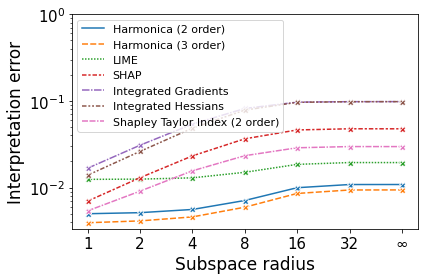

In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

index = ["1","2","4","8","16","32","∞"] 
df_L2 = pd.DataFrame(L2_inconsistency.T, index, method_legend_name) 

ax_L2 = sns.lineplot(data=df_L2, marker='X') 
# ax_L2.set(xlabel='Subspace radius', ylabel='Interpretation error') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L2.set(yscale='log')
ax_L2.set(ylim=[0,1])
fig_L2 = ax_L2.get_figure() 
ax_L2.legend(fontsize=11)
plt.tight_layout()
fig_L2.savefig("interpretation-error-sst2-plot-l2.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


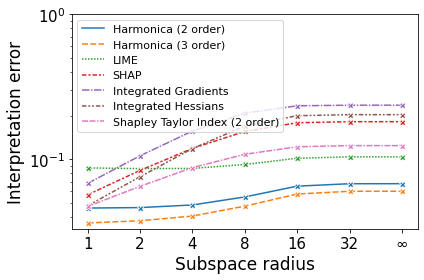

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"]
df_L1 = pd.DataFrame(L1_inconsistency.T, index, method_legend_name)

ax_L1 = sns.lineplot(data=df_L1, marker='X')
# ax_L1.set(xlabel='Subspace radius', ylabel='Interpretation error')
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L1.set(yscale='log')
ax_L1.set(ylim=[0,1])
fig_L1 = ax_L1.get_figure() 
ax_L1.legend(fontsize=11)
plt.tight_layout()
fig_L1.savefig("interpretation-error-sst2-plot-l1.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


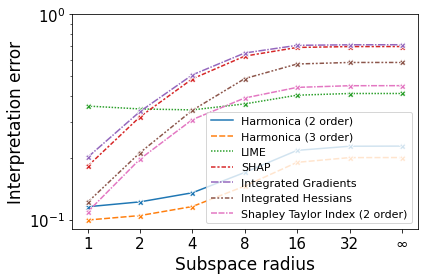

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L0 = pd.DataFrame(L0_inconsistency.T, index, method_legend_name) 

ax_L0 = sns.lineplot(data=df_L0, marker='X') 
# ax_L0.set(xlabel='Subspace radius', ylabel='Interpretation error') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L0.set(yscale='log')
ax_L0.set(ylim=[0,1])
fig_L0 = ax_L0.get_figure() 
ax_L0.legend(fontsize=11)
plt.tight_layout()
fig_L0.savefig("interpretation-error-sst2-plot-l0.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


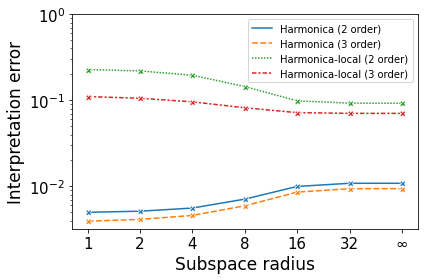

In [51]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L2h = pd.DataFrame(L2_inconsistency_harmonica.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "Harmonica-local (2 order)", "Harmonica-local (3 order)"]) 

ax_L2h = sns.lineplot(data=df_L2h, marker='X') 
# ax_L2h.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L2h.set(yscale='log')
ax_L2h.set(ylim=[0,1])
fig_L2h = ax_L2h.get_figure() 
ax_L0.legend(fontsize=11)
plt.tight_layout()
fig_L2h.savefig("interpretation-error-sst2-plot-l2-harmonica.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


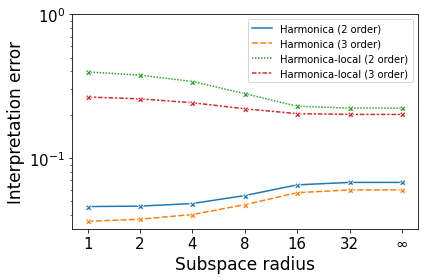

In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L1h = pd.DataFrame(L1_inconsistency_harmonica.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "Harmonica-local (2 order)", "Harmonica-local (3 order)"]) 

ax_L1h = sns.lineplot(data=df_L1h, marker='X') 
# ax_L1h.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L1h.set(yscale='log')
ax_L1h.set(ylim=[0,1])
fig_L1h = ax_L1h.get_figure() 
ax_L0.legend(fontsize=11)
plt.tight_layout()
fig_L1h.savefig("interpretation-error-sst2-plot-l1-harmonica.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


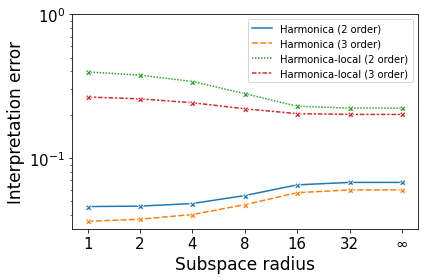

In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","16","32","∞"] 
df_L0h = pd.DataFrame(L0_inconsistency_harmonica.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "Harmonica-local (2 order)", "Harmonica-local (3 order)"]) 

ax_L0h = sns.lineplot(data=df_L1h, marker='X') 
# ax_L0h.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L0h.set(yscale='log')
ax_L0h.set(ylim=[0,1])
fig_L0h = ax_L0h.get_figure() 
ax_L0.legend(fontsize=11)
plt.tight_layout()
fig_L0h.savefig("interpretation-error-sst2-plot-l0-harmonica.pdf")